<a href="https://colab.research.google.com/github/minakshibiradar/Machine-Learning-Project/blob/main/stock_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance transformers streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.8 MB/s eta 0:00:00


In [43]:
import yfinance as yf

# Download Tesla stock data
df = yf.download('TSLA', start='2010-01-01', end='2024-11-17')

print(df.head())



[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         TSLA      TSLA      TSLA      TSLA      TSLA   
Date                                                                          
2010-06-29 00:00:00+00:00  1.592667  1.592667  1.666667  1.169333  1.266667   
2010-06-30 00:00:00+00:00  1.588667  1.588667  2.028000  1.553333  1.719333   
2010-07-01 00:00:00+00:00  1.464000  1.464000  1.728000  1.351333  1.666667   
2010-07-02 00:00:00+00:00  1.280000  1.280000  1.540000  1.247333  1.533333   
2010-07-06 00:00:00+00:00  1.074000  1.074000  1.333333  1.055333  1.333333   

Price                         Volume  
Ticker                          TSLA  
Date                                  
2010-06-29 00:00:00+00:00  281494500  
2010-06-30 00:00:00+00:00  257806500  
2010-07-01 00:00:00+00:00  123282000  
2010-07-02 00:00:00+00:00   77097000  
2010-07-06 00:00:00+00:00  103003500  


In [44]:
import pandas as pd
import numpy as np

# Add technical indicators
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))

# Drop NaN rows caused by rolling calculations
df.dropna(inplace=True)

# Features and target
df['Target'] = df['Close'].shift(-1)  # Next day's closing price
features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'RSI']]
target = df['Target']

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

print(features[:5])


[[-0.74739619 -0.74727201 -0.74814679 -0.74795447 -1.12258266 -0.7477361
   1.79752106]
 [-0.74762625 -0.74744706 -0.74798309 -0.74784576 -1.15190768 -0.74783839
   1.11527432]
 [-0.74748566 -0.74745956 -0.74831705 -0.74808235 -1.12329416 -0.74795067
   1.01283427]
 [-0.74784991 -0.74773463 -0.74861172 -0.74834453 -1.15965718 -0.74801585
   1.01259704]
 [-0.7476582  -0.7474033  -0.74810096 -0.74771786 -1.10366082 -0.74796035
   0.90737688]]


In [48]:
# Ensure both features and target are aligned and no NaN values are present
df = df.dropna(subset=['Target'])  # Drop rows in 'Target' column with NaN values

# Now update the features and target
features = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'RSI']]  # Features
target = df['Target']  # Target

# Now perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


KeyError: ['Target']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target.dropna(), test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [3603, 3602]

In [49]:
# Check the column names of the DataFrame
print(df.columns)


MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA'),
            (    'MA_20',     ''),
            (      'RSI',     ''),
            (   'Target',     '')],
           names=['Price', 'Ticker'])


In [50]:
# Drop rows with NaN values in the 'Target' column using MultiIndex
df = df.dropna(subset=[('Target', '')])

# Now, update the features and target
features = df[[( 'Open', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Close', 'TSLA'),
               ('Volume', 'TSLA'), ('MA_20', ''), ('RSI', '')]]  # Features columns
target = df[('Target', '')]  # Target column

# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (2881, 7)
Testing data shape: (721, 7)


In [51]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model's performance on the training data
train_score = model.score(X_train, y_train)
print(f"Training score: {train_score:.4f}")

# Check the model's performance on the testing data
test_score = model.score(X_test, y_test)
print(f"Testing score: {test_score:.4f}")


Training score: 0.9976
Testing score: 0.9981


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict values on test set
y_pred = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 20.7689
Root Mean Squared Error (RMSE): 4.5573


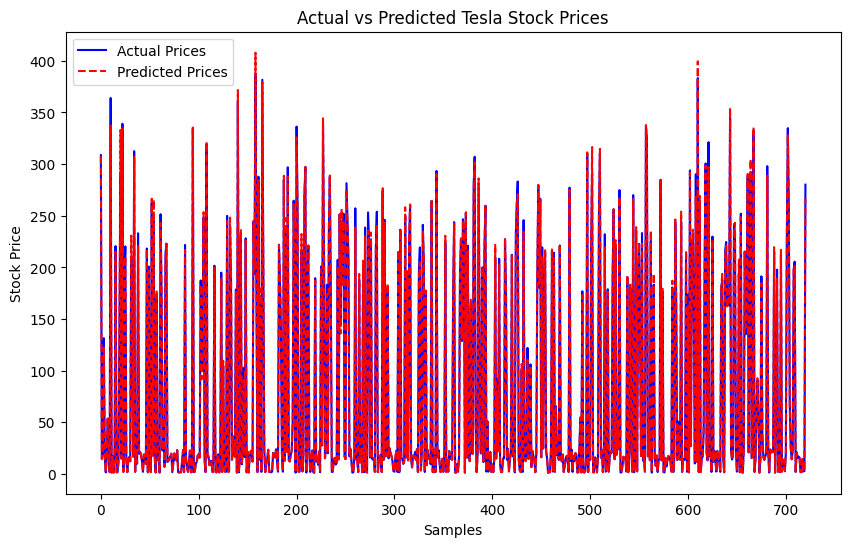

In [53]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Tesla Stock Prices')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [54]:
import joblib

# Save the model to a file
joblib.dump(model, 'tesla_stock_prediction_model.pkl')

print("Model saved successfully.")


Model saved successfully.


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Evaluate
y_pred_lstm = model.predict(X_test_lstm)
print('LSTM RMSE:', mean_squared_error(y_test, y_pred_lstm, squared=False))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 17102.8809
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15142.9014
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 14495.5498
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 13564.3457
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13504.0127
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 12265.5801
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 12390.1270
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 12272.2988
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 11595.5977
Epoch 10/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10756.5059
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
LSTM RMSE: 101.39700167591326


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
from transformers import pipeline

# Use a pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Example news data
news_headlines = [
    "Tesla hits record high as EV demand surges",
    "Elon Musk announces new Tesla model"
]

# Get sentiment scores
sentiments = [sentiment_pipeline(headline)[0]['score'] for headline in news_headlines]
print(sentiments)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[0.9988629817962646, 0.9986332058906555]


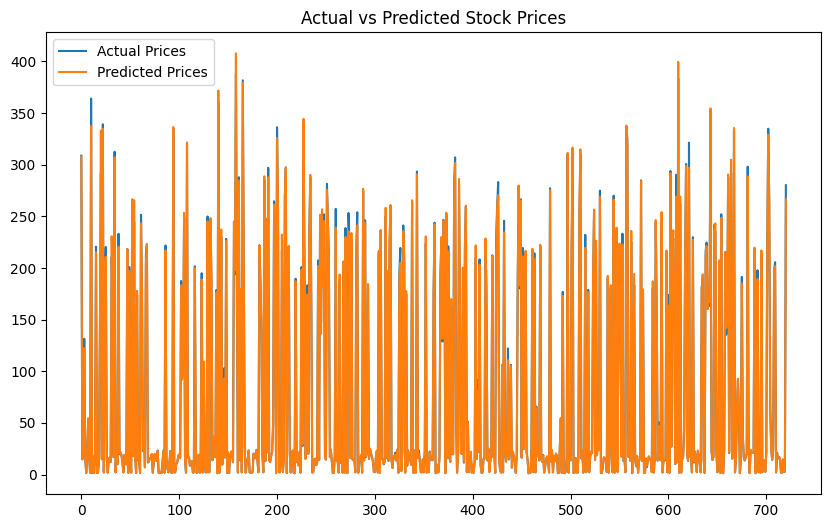

In [57]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the features to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'RSI']])

# Create sequences of data for LSTM (sequence_length = 60 for example)
sequence_length = 60
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i])
    y_lstm.append(scaled_data[i, 3])  # 'Close' column (index 3)

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)


In [59]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]


In [60]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential()

# Adding LSTM layers
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))

# Adding output layer
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.0077 - val_loss: 0.0029
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 8.6378e-04 - val_loss: 0.0056
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 9.8537e-04 - val_loss: 0.0042
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 9.4481e-04 - val_loss: 0.0017
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 6.1297e-04 - val_loss: 0.0021
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 7.1813e-04 - val_loss: 0.0021
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 6.9876e-04 - val_loss: 0.0016
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 7.4067e-04 - val_loss: 0.0015
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 7.8495e-04 - val_loss: 0.0015


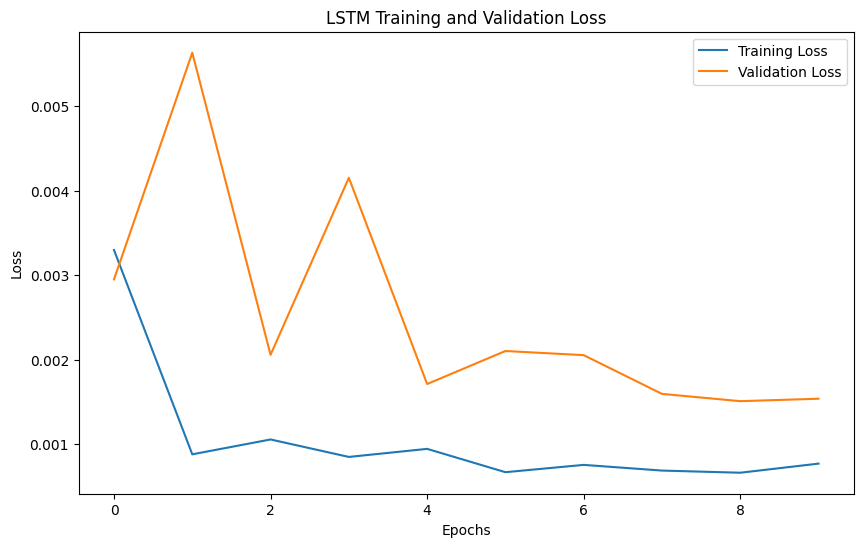

In [61]:
# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Plot the loss curves (training and validation)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [62]:
# Evaluate the model on the test data
test_loss = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Test Loss: 0.0015


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


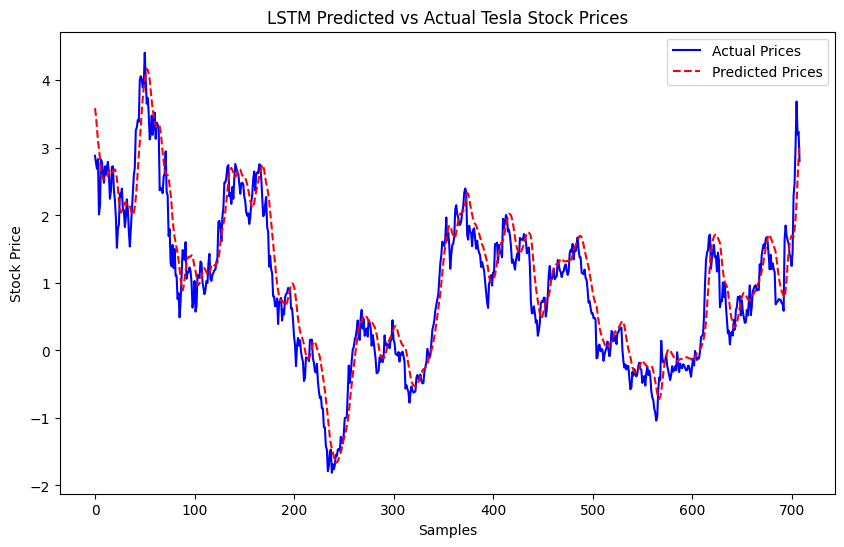

In [63]:
# Predict the stock prices
predicted_prices = model_lstm.predict(X_test_lstm)

# Reverse scaling of the predictions
predicted_prices = scaler.inverse_transform(np.hstack((np.zeros((predicted_prices.shape[0], 6)), predicted_prices)))[:, -1]
actual_prices = scaler.inverse_transform(np.hstack((np.zeros((y_test_lstm.shape[0], 6)), y_test_lstm.reshape(-1, 1))))[:, -1]

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red', linestyle='--')
plt.title('LSTM Predicted vs Actual Tesla Stock Prices')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [64]:
# Save the LSTM model
model_lstm.save('tesla_stock_prediction_lstm_model.h5')
print("LSTM Model saved successfully.")


LSTM Model saved successfully.


In [65]:
!pip install tweepy


In [66]:
import tweepy
import pandas as pd

# Authenticate with Twitter API
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

# Search for Tesla-related tweets
tweets = api.search(q='Tesla', lang='en', count=100)

# Collect tweet texts
tweet_texts = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_texts, columns=['text'])

# Display the first few tweets
print(tweet_df.head())


AttributeError: 'API' object has no attribute 'search'

In [67]:
!pip install tweepy --upgrade


In [68]:
import tweepy
import pandas as pd
